In [1]:
import numpy
import pandas as pd
from sklearn.manifold import SpectralEmbedding
from sklearn.datasets import make_swiss_roll, make_s_curve
import matplotlib.pyplot as plt
from Spectral_Embedding.spectral_embedding import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Swiss Roll

Measuring the time for getting Spectral embedding vetors of sklearn rbf, sklearn nearest neighbour and self implemented

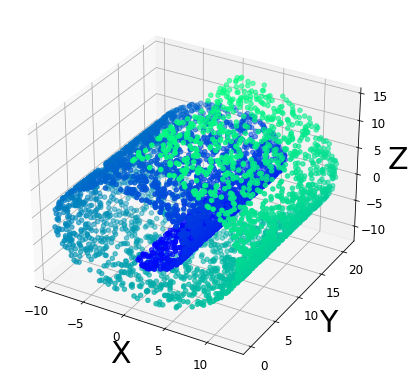

In [2]:
N_swiss = 5000
X_es_swiss, t_swiss = make_swiss_roll(N_swiss, random_state = 1337)

X_swiss = X_es_swiss[:, 0]
Y_swiss = X_es_swiss[:, 1]
Z_swiss = X_es_swiss[:, 2]

# Plot the figure
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(211, projection='3d')

ax.scatter(X_swiss, Y_swiss, Z_swiss, c=t_swiss, cmap='winter')
ax.tick_params(labelsize = 'larger')
ax.set_xlabel("X", fontsize = 30)
ax.set_ylabel("Y", fontsize = 30)
ax.set_zlabel("Z", fontsize = 30)

plt.show()

In [3]:
embedding_swiss_rbf = SpectralEmbedding(n_components=2, affinity = 'rbf')#, eigen_solver = "arpack")
%timeit embedding_swiss_rbf.fit_transform(X_es_swiss)

8.13 s ± 605 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
embedding_swiss_n = SpectralEmbedding(n_components=2, n_neighbors=10)
%timeit embedding_swiss_n.fit_transform(X_es_swiss)

1.2 s ± 67 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
%timeit spec_emd(X_es_swiss, 2)

4 s ± 66.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
spectral_swiss_sk_rbf = embedding_swiss_rbf.fit_transform(X_es_swiss)
spectral_swiss_sk_n = embedding_swiss_n.fit_transform(X_es_swiss)
spectral_swiss_own = spec_emd(X_es_swiss, 2)

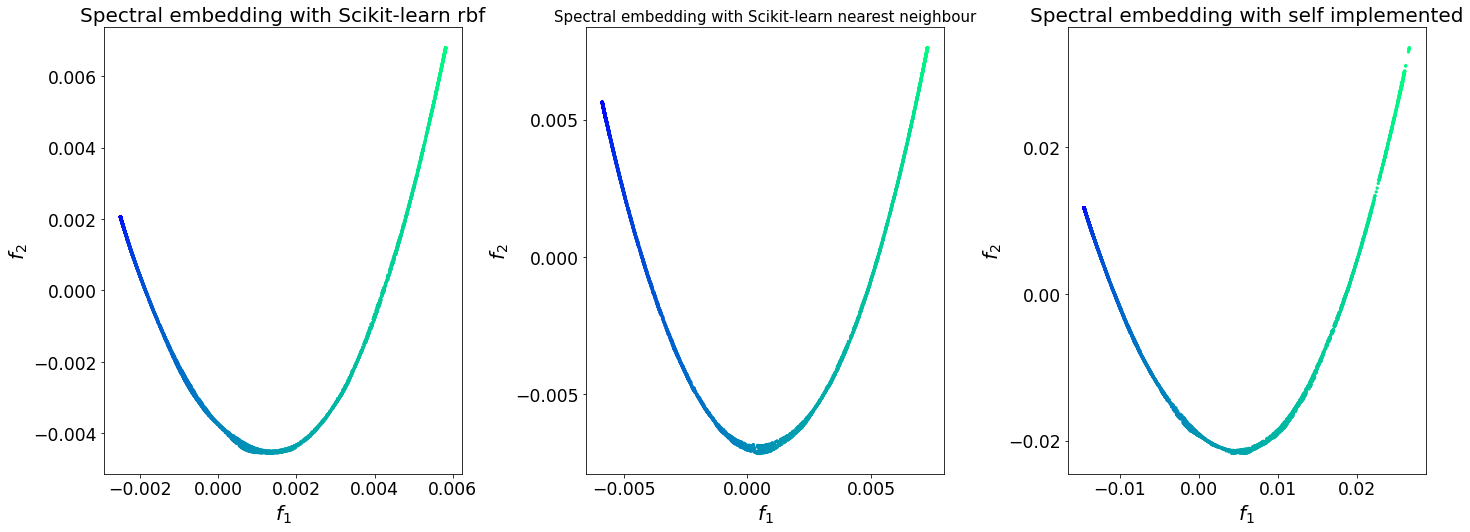

In [7]:
height = 3
fig = plt.figure(figsize=(20, 7.5))
ax = fig.subplots(1, height)

ax[0].scatter(spectral_swiss_sk_rbf[:,0], spectral_swiss_sk_rbf[:,1], s=5, c=t_swiss, cmap='winter')
ax[0].set_xlabel(r'$f_1$', fontsize = 20)
ax[0].set_ylabel(r'$f_2$', fontsize = 20)
ax[0].set_title('Spectral embedding with Scikit-learn rbf', fontsize = 20)
ax[0].tick_params(axis='both', labelsize = 10)
ax[0].tick_params(labelsize = 'xx-large')
ax[0].locator_params(axis='both', nbins=7)

ax[1].scatter(spectral_swiss_sk_n[:,0], spectral_swiss_sk_n[:,1], s=5, c=t_swiss, cmap='winter')
ax[1].set_xlabel(r'$f_1$', fontsize = 20)
ax[1].set_ylabel(r'$f_2$', fontsize = 20)
ax[1].set_title('Spectral embedding with Scikit-learn nearest neighbour', fontsize = 15)
ax[1].tick_params(axis='both', labelsize = 10)
ax[1].tick_params(labelsize = 'xx-large')
ax[1].locator_params(axis='both', nbins=5)


ax[2].scatter(spectral_swiss_own[:,0], spectral_swiss_own[:,1], s=5, c=t_swiss, cmap='winter')
ax[2].set_xlabel(r'$f_1$', fontsize = 20)
ax[2].set_ylabel(r'$f_2$', fontsize = 20)
ax[2].set_title('Spectral embedding with self implemented', fontsize = 20)
ax[2].tick_params(axis='both', labelsize = 10)
ax[2].tick_params(labelsize = 'xx-large')
ax[2].locator_params(axis='both', nbins=5)


fig.tight_layout()

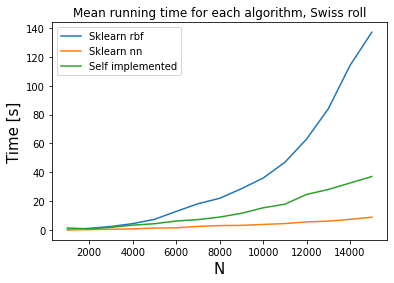

In [8]:
data = pd.read_csv('Performance_data/time_swiss.txt', index_col='N')
data.head()
data.plot(y = [0, 2, 4], label=['Sklearn rbf', 'Sklearn nn', 'Self implemented'])
plt.title('Mean running time for each algorithm, Swiss roll')
plt.xlabel('N', fontsize = 15)
plt.ylabel('Time [s]', fontsize = 15)
plt.show()

# S-curve Roll

Measuring the time for getting spectral embedding of sklearn rbf, sklearn nearest neighbour and self implemented

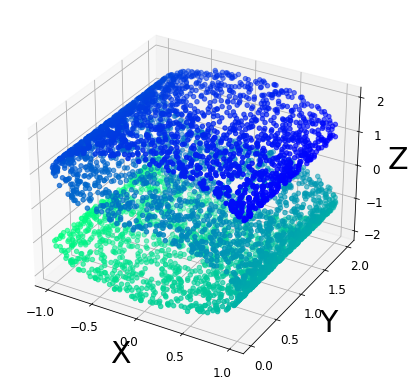

In [9]:
N_scurve = 5000
X_es_scurve, t_scurve = make_s_curve(N_scurve, random_state = 1337)

X_scurve = X_es_scurve[:, 0]
Y_scurve = X_es_scurve[:, 1]
Z_scurve = X_es_scurve[:, 2]

# Plot the figure
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(211, projection='3d')

ax.scatter(X_scurve, Y_scurve, Z_scurve, c=t_scurve, cmap='winter')
ax.tick_params(labelsize = 'larger')
ax.set_xlabel("X", fontsize = 30)
ax.set_ylabel("Y", fontsize = 30)
ax.set_zlabel("Z", fontsize = 30)
ax.locator_params(nbins=5)

plt.show()

In [10]:
embedding_scurve_rbf = SpectralEmbedding(n_components=2, affinity = 'rbf')#, eigen_solver = "arpack")
%timeit embedding_scurve_rbf.fit_transform(X_es_scurve)

4.13 s ± 593 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
 embedding_scurve_n = SpectralEmbedding(n_components=2, n_neighbors=10)
%timeit embedding_scurve_n.fit_transform(X_es_scurve)

1.18 s ± 23.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
%timeit spec_emd(X_es_scurve, 2)

2.16 s ± 35.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
spectral_scurve_sk_rbf = embedding_scurve_rbf.fit_transform(X_es_scurve)
spectral_scurve_sk_n = embedding_scurve_n.fit_transform(X_es_scurve)
spectral_scurve_own = spec_emd(X_es_scurve, 2)

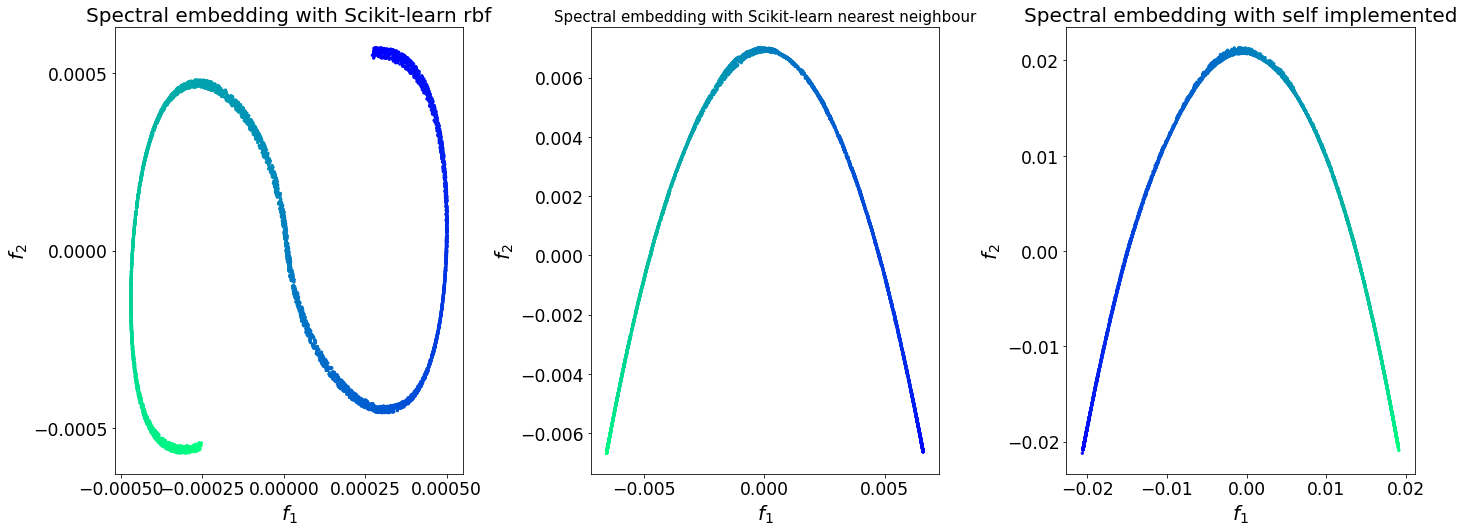

In [14]:
height = 3
fig = plt.figure(figsize=(20, 7.5))
ax = fig.subplots(1, height)

ax[0].scatter(spectral_scurve_sk_rbf[:,0], spectral_scurve_sk_rbf[:,1], s=5, c=t_scurve, cmap='winter')
ax[0].set_xlabel(r'$f_1$', fontsize = 20)
ax[0].set_ylabel(r'$f_2$', fontsize = 20)
ax[0].set_title('Spectral embedding with Scikit-learn rbf', fontsize = 20)
ax[0].tick_params(axis='both', labelsize = 10)
ax[0].tick_params(labelsize = 'xx-large')
ax[0].locator_params(axis='both', nbins=5)

ax[1].scatter(spectral_scurve_sk_n[:,0], spectral_scurve_sk_n[:,1], s=5, c=t_scurve, cmap='winter')
ax[1].set_xlabel(r'$f_1$', fontsize = 20)
ax[1].set_ylabel(r'$f_2$', fontsize = 20)
ax[1].set_title('Spectral embedding with Scikit-learn nearest neighbour', fontsize = 15)
ax[1].tick_params(axis='both', labelsize = 10)
ax[1].tick_params(labelsize = 'xx-large')
ax[1].locator_params(axis='x', nbins=5)

ax[2].scatter(spectral_scurve_own[:,0], spectral_scurve_own[:,1], s=5, c=t_scurve, cmap='winter')
ax[2].set_xlabel(r'$f_1$', fontsize = 20)
ax[2].set_ylabel(r'$f_2$', fontsize = 20)
ax[2].set_title('Spectral embedding with self implemented', fontsize = 20)
ax[2].tick_params(axis='both', labelsize = 10)
ax[2].tick_params(labelsize = 'xx-large')
ax[2].locator_params(axis='both', nbins=5)

fig.tight_layout()

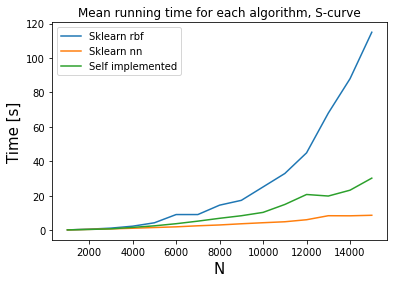

In [15]:
data = pd.read_csv('Performance_data/time_scurve.txt', index_col='N')
data.head()
data.plot(y = [0, 2, 4], label=['Sklearn rbf', 'Sklearn nn', 'Self implemented'])
plt.title('Mean running time for each algorithm, S-curve')
plt.xlabel('N', fontsize = 15)
plt.ylabel('Time [s]', fontsize = 15)
plt.show()